In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize
import os

from JJ_data_processing import *
from JJformulas import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

from scipy.optimize import curve_fit


D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

In [3]:
def load_hist_by_id(idx):
    _, Isws = xy_by_id(idx)
    return Isws

In [12]:
FF_ = .232e-3
ZF_ = .004e-3

def populate_exps (exps, VERBOSE = False):

    texps = tqdm_notebook(exps)
    for exp in texps:

        Isws = []
        R0s = []

        if VERBOSE:
            fig, ax = plt.subplots()

        Is = []
        Vs = []

        Irs = []
        Vrs = []

        Ils = []
        Vls = []

        for i in exp['ids']:

            I, V = xy_by_id(i)

            Tb = exp['T']

            ind_Vmax = np.argmax(I)
            ind_Vmin = np.argmin(I)

            ind_I0 = np.argmin(abs(I - 0e-12))
            ind_near0 = np.where(abs(I) > 0e-9)

            V_off = np.mean(V[ind_near0])
            V -= V_off

            I, V = cut_dxdy(I, V, dx = 250e-9 ,dy = 50e-6)

            V_off = np.mean(V)
            V -= V_off

    
            g0 = np.where(I>0)
            l0 = np.where(I<0)

            Ir, Vr = I[g0], V[g0]
            Il, Vl = I[l0], V[l0]


            if VERBOSE:
                ax.plot(I,V, 'o')

            Isw, R0 = extract_Isw_R0 (I,V)
            Isws.append(Isw)
            R0s.append(R0)


            Is.append(I)
            Vs.append(V)

            Irs.append(Ir)
            Vrs.append(Vr)

            Ils.append(Il)
            Vls.append(Vl)



        exp ['Is' ] =  Is
        exp ['Vs' ] =  Vs

        exp ['Irs' ] =  Irs
        exp ['Vrs' ] =  Vrs

        exp ['Ils' ] =  Ils
        exp ['Vls' ] =  Vls



        exp ['Isws'] =  np.array(Isws)
        exp ['R0s' ] =  np.array(R0s )
        exp ['cos' ] =  np.array( abs(np.cos(np.pi*(exp['B'] - ZF_ )/(2* (FF_ - ZF_)  )) ) )


# 74N4

In [4]:
SAMPLE = '79N6'

qc.config["core"]["db_location"] = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)

# 74N4

<IPython.core.display.Javascript object>


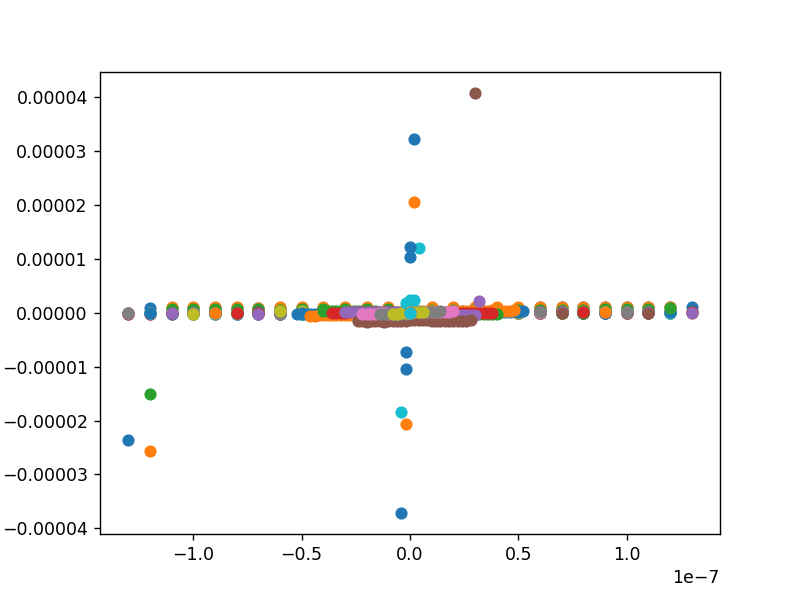

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


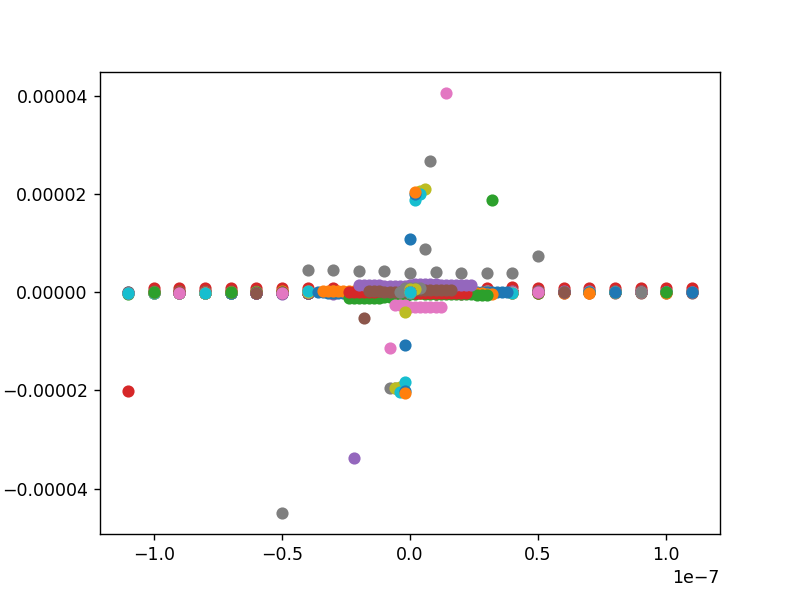

<IPython.core.display.Javascript object>


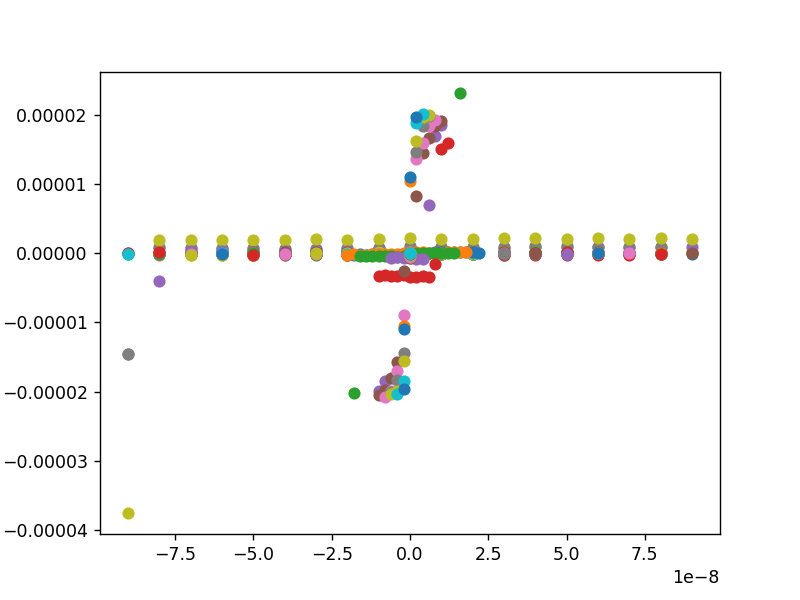

<IPython.core.display.Javascript object>


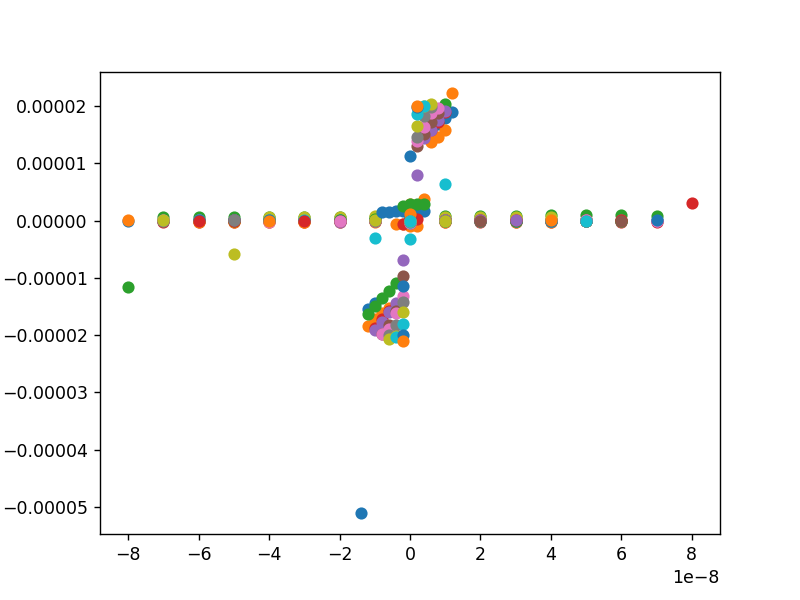

<IPython.core.display.Javascript object>


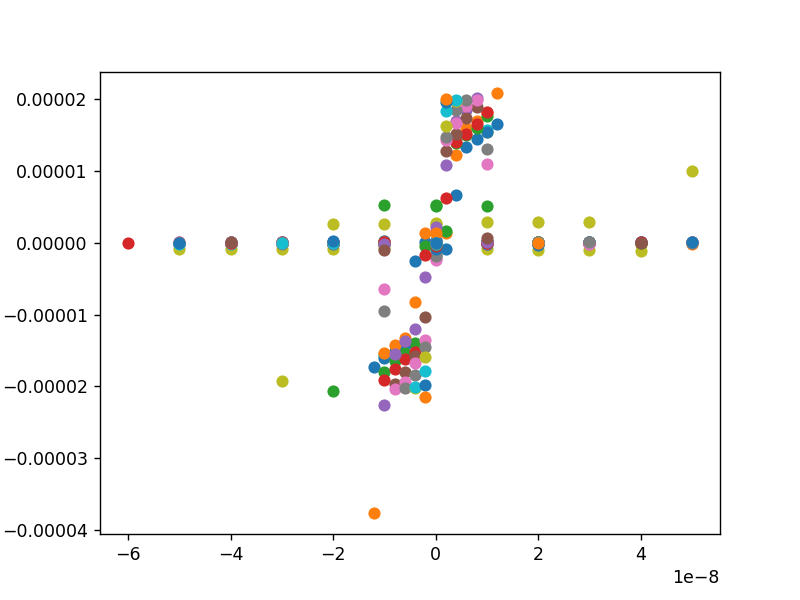

<IPython.core.display.Javascript object>


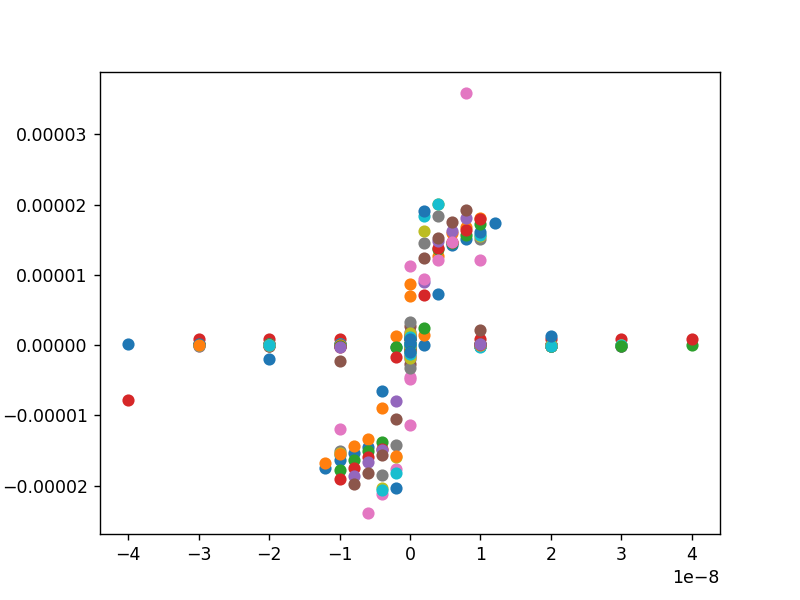

e:\OneDrive - Rutgers University\files_GitHub\JJ_arrays\JJ_data_processing.py:250: RuntimeWarning: divide by zero encountered in double_scalars
  #         R0 = np.mean(np.diff(Vs[n_sl])) / np.mean(np.diff(Is[n_sl]))


<IPython.core.display.Javascript object>


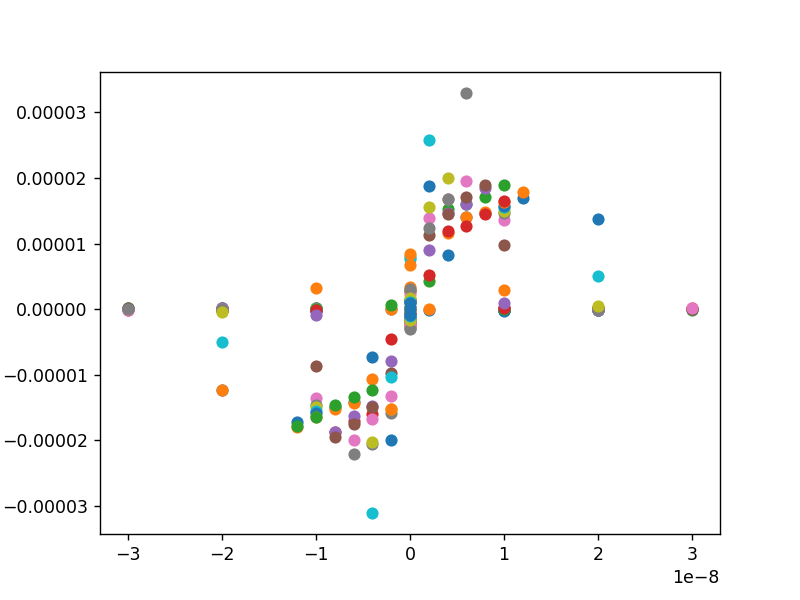

<IPython.core.display.Javascript object>


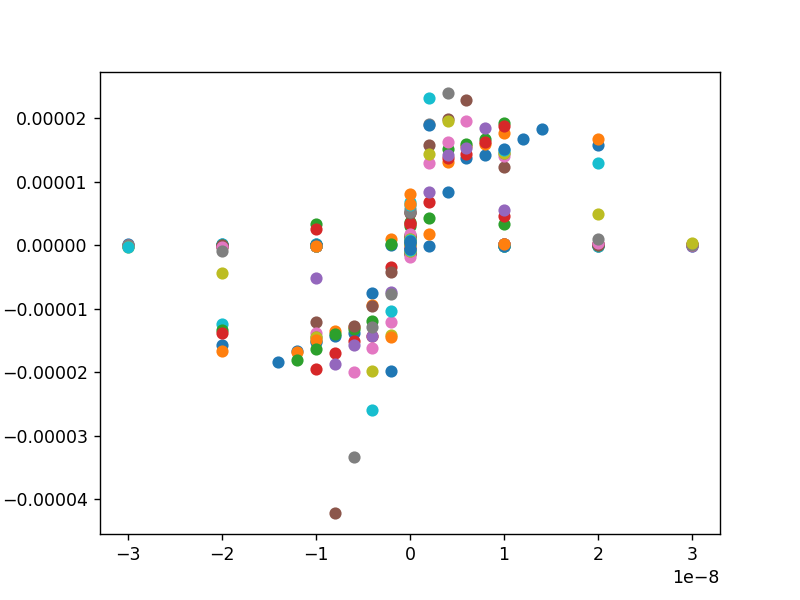

<IPython.core.display.Javascript object>


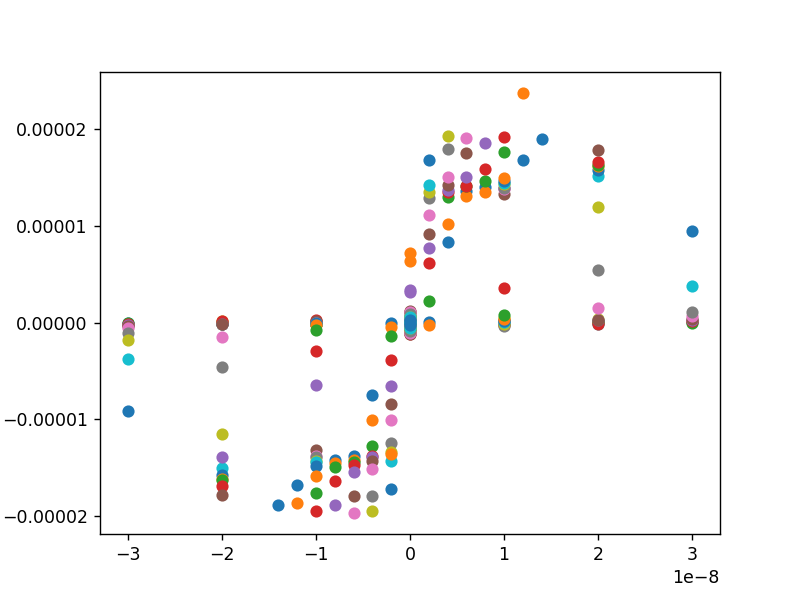

<IPython.core.display.Javascript object>


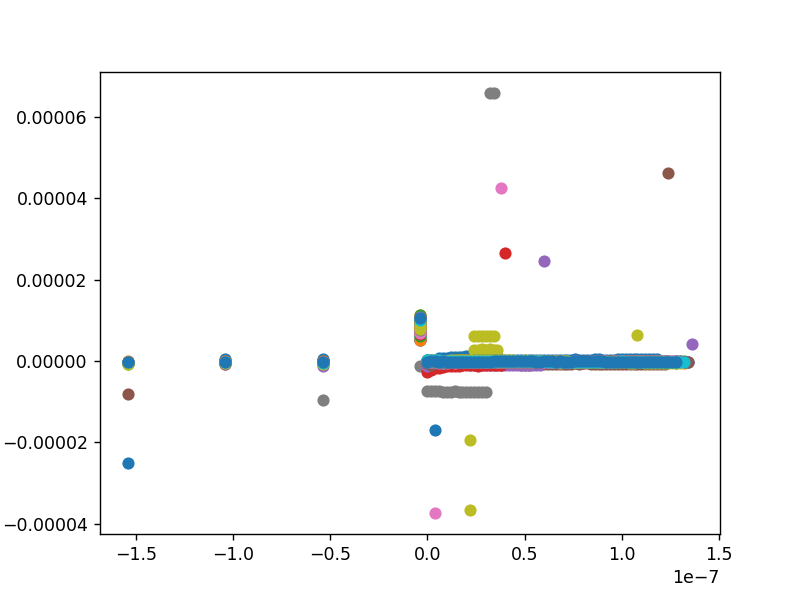

In [14]:
ZF =  0.004e-3
FF =  0.224e-3
dF = 0.250e-3
midF = 0.154e-3

keys = [                  'ids', 'T',    'B',                                  'Vthr', 'comments'        ]  
valss =[
    #[        np.array([1]),  16e+0, np.array([ZF])                      , np.nan, 'quick IVc meas'  ],
       #[         np.array([2]),  43e-3, np.array([ZF])                      , np.nan, 'quick IVc meas'  ],
       #[      range( 74,104+1),  43e-3, np.array([ZF])                      , np.nan, 'Ic stats'        ],
       #[      range(105,107+1),  43e-3, np.array([ZF,midF,FF])              , np.nan, 'quick IVc vs B'  ],
       [      range(108,158+1),  50e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(159,209+1), 100e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(210,260+1), 150e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(261,311+1), 200e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(312,362+1), 250e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(363,413+1), 300e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(414,464+1), 350e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   1e-3, 'IVc vs B'        ],
       [      range(465,515+1), 400e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   3e-5, 'IVc vs B'        ],
       [      range(516,566+1), 450e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   3e-5, 'IVc vs B'        ],
       [    range(1234,1284+1),  50e-3, np.linspace(ZF, ZF + 2.0*dF, 51)    ,   3e-5, 'IVc vs B I_ff'   ]]
#        [      range(567,617+1), 500e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   3e-5, 'IVc vs B'        ],
#        [      range(618,668+1), 550e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   3e-5, 'IVc vs B'        ],
#        [      range(669,719+1), 600e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   3e-5, 'IVc vs B'        ],
#        [      range(720,770+1), 650e-3, np.arange(ZF, ZF + 1.02*dF, 5e-6)   ,   3e-5, 'IVc vs B'        ]]
    
    
exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

populate_exps (exps, VERBOSE = True)
# populate_exps (exps)

## IVC

<IPython.core.display.Javascript object>


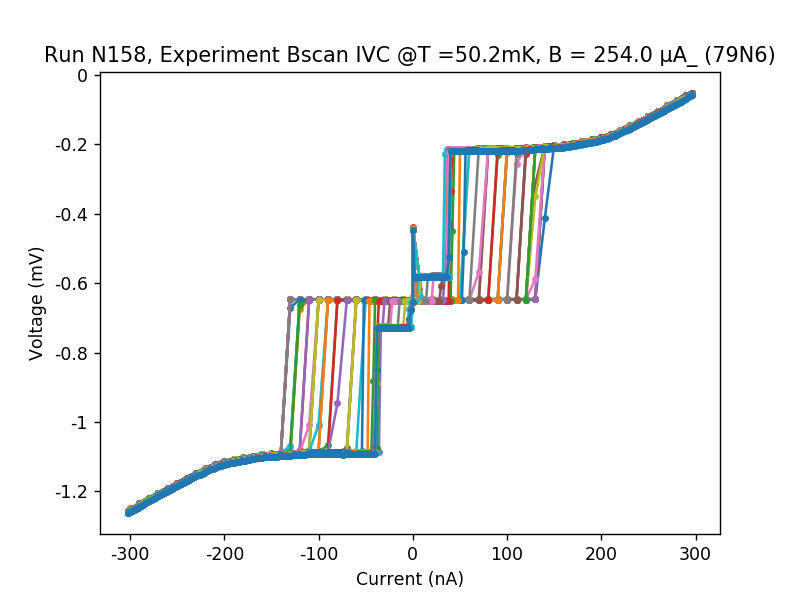

In [23]:
fig, ax = plt.subplots()
exp = exps[0]
for idx in exp['ids']:
#for cos in [1,  0.4,.3, 0.2 , 0.1, 0]:
#    ind = load_by_key(exp, 'cos', cos )
    
    plot_by_id(idx, ax, marker = '.', ls ='-')
#    plot_by_id(exp['ids'][ind], ax, marker = '.', ls ='-')
#     plot_by_key(exp, 'cos', cos, ax, ls = '')

### Gap vs T

Observe a wigling, at all temperatures, why?

In [2]:
for i in range(1):
    print(i)

0


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


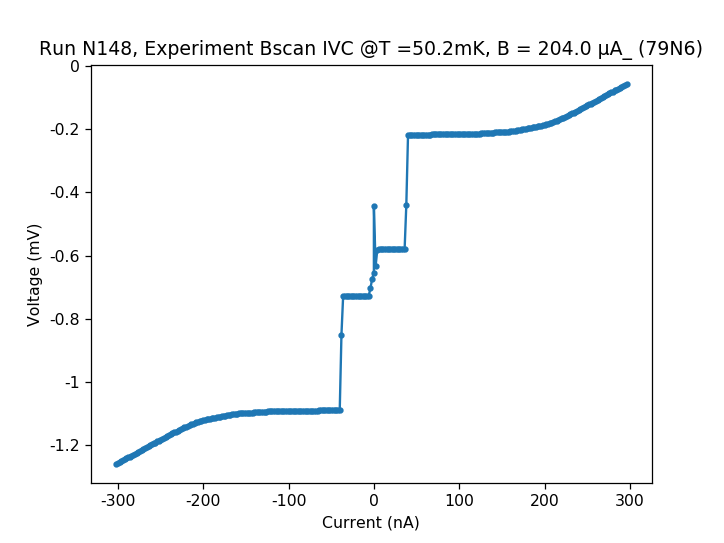

In [484]:
fig, ax = plt.subplots()

for exp in exps[:1]:
    ind = load_by_key(exp, 'cos', .2)
    
    plot_by_id(exp['ids'][ind], ax, marker = '.', ls ='-')


## Isw(cos)

<IPython.core.display.Javascript object>


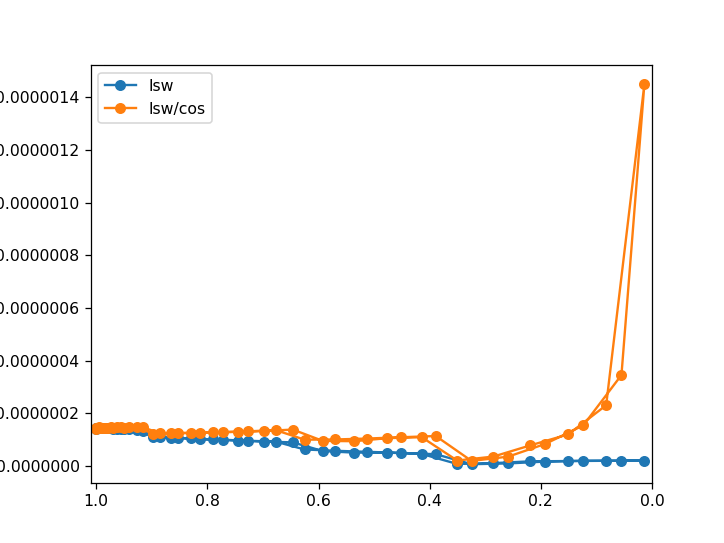

In [233]:
fig, ax = plt.subplots()

exp = exps[-1]


ax.plot(exp ['cos' ] , exp['Isws'], 'o-', label = 'Isw')

ax.plot(exp ['cos' ], exp['Isws']/exp ['cos' ], 'o-', label = 'Isw/cos')

#ax.plot(exp ['cos' ], exp['Isws']/exp ['cos' ]**1.5, 'o-', label = 'Isw/cos^1.5')
# ax.set_yscale('log')
# ax.set_ylim(0,5e-8)


ax.set_xlim(1.01,0)

    
ax.legend()


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


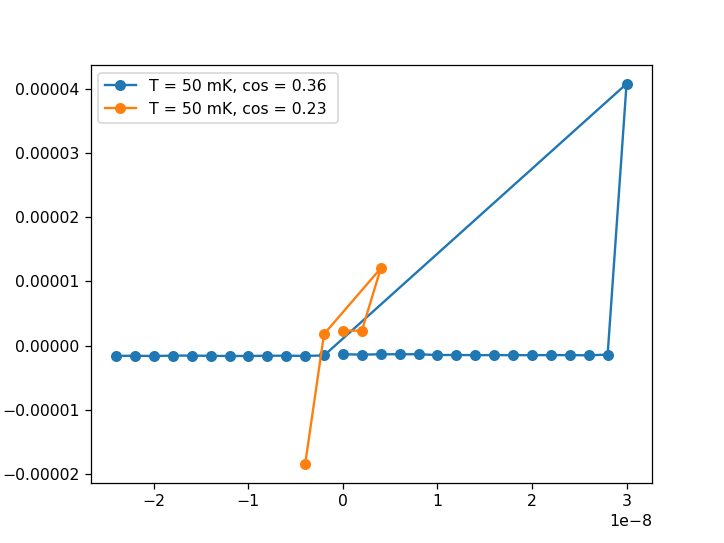

In [471]:
fig, ax = plt.subplots()
exp = exps[0]
for cos in [ 0.35, 0.21]:

    plot_by_key(exp, 'cos', cos, ax,  ls = '-')



D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


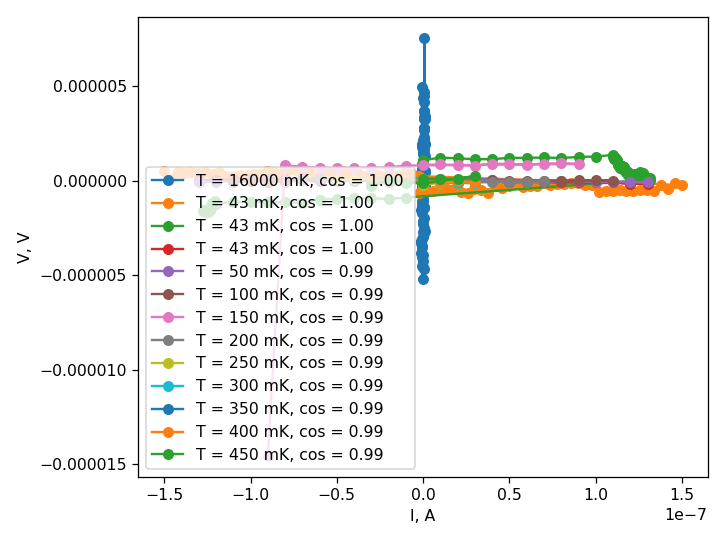

In [460]:
fig, ax = plt.subplots()
ax.set_xlabel('I, A')
ax.set_ylabel('V, V')

cos = 0.99
for exp in exps[:-1]:
    I, V = plot_by_key(exp, 'cos', cos, ax, ls = '-')
    ind = load_by_key(exp, 'cos', cos)

#     plot_by_id(exp['ids'][ind], ax, marker = '.')
#     ax.plot(abs(I + 100e-12), abs(V), '.')

#     ax.plot(-abs(I + 0e-12), -abs(V), '.')

plt.tight_layout()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


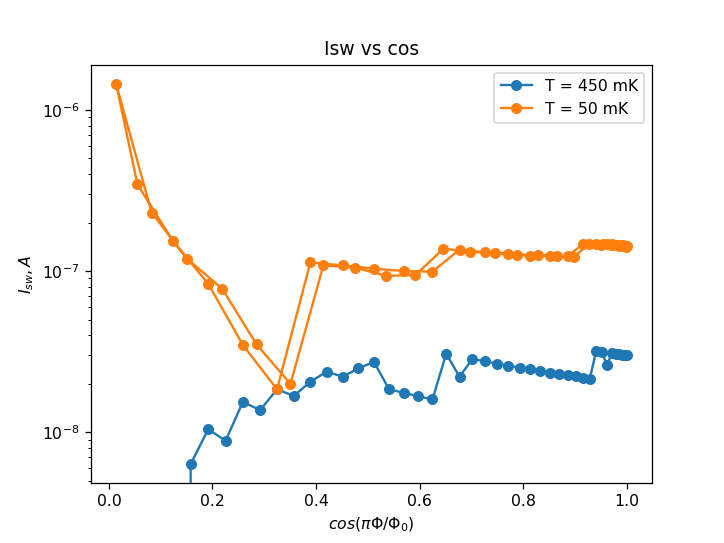

In [461]:
fig, ax = plt.subplots()

cs = [f'C{i}' for i in range(15)]


for i, exp in enumerate(exps[-2:]):

#     cos = abs(np.cos(np.pi*(exp['B']-.22e-3 )/2.8e-3) )

#     cos = abs(np.pi*(exp['B']-.22e-3 )/2.8e-3) 
    
    
    Tstr = 'T = {:2.0f} mK'.format( exp['T']/1e-3)

    ax.set_title('Isw vs cos' )

    ax.plot(exp['cos'], exp['Isws']/exp['cos'], 'o-', color = cs[i] , label = Tstr)
#     ax.plot(exp['cos'], exp['Isws'], 'o-', color = cs[i] , label = Tstr)
    ax.set_yscale('log')

    ax.set_xlabel(r'$cos (\pi \Phi / \Phi_0)$')
    ax.set_ylabel(r'$I_{sw}, A$')
    
#     ax.set_xlim(1,0.1)
#     ax.set_ylim(1e-9, 50e-9)

    ax.legend()

    
# ax.set_xscale('log')

## Isw(T)

<IPython.core.display.Javascript object>


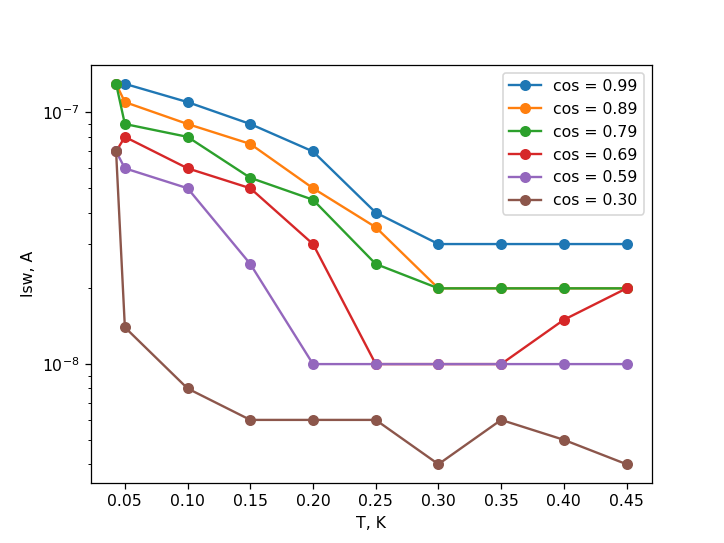

In [92]:
fig, ax = plt.subplots()

# for cos in [    .3, .25]:    
for cos in [ 0.99, 0.89, 0.79, 0.69, 0.59, .3]:    
    Ts   = [exp['T'] for exp in exps[3:]]
    Isws = [exp['Isws'][load_by_key(exp, 'cos', cos)] for exp in exps[3:]]

    ax.plot(Ts, Isws, 'o-', label = 'cos = {:1.2f}'.format(cos) )
    
    
ax.legend()

ax.set_xlabel('T, K')
ax.set_ylabel('Isw, A')

ax.set_yscale('log') 

## R0(T)

<IPython.core.display.Javascript object>


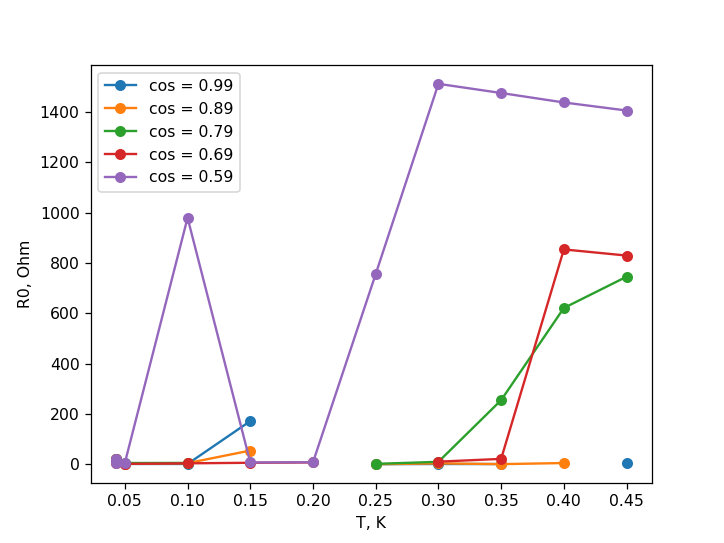

Text(0, 0.5, 'R0, Ohm')

In [76]:
fig, ax = plt.subplots()

for cos in [ 0.99, 0.89, 0.79, 0.69, 0.59]:       
    Ts   = [exp['T'] for exp in exps]
    Isws = [exp['R0s'][load_by_key(exp, 'cos', cos)] for exp in exps]

    ax.plot(Ts, Isws, 'o-',  label = 'cos = {:1.2f}'.format(cos))

# ax.set_yscale('log')    

ax.legend()
ax.set_xlabel('T, K')
ax.set_ylabel('R0, Ohm')

## IVCs (cos)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


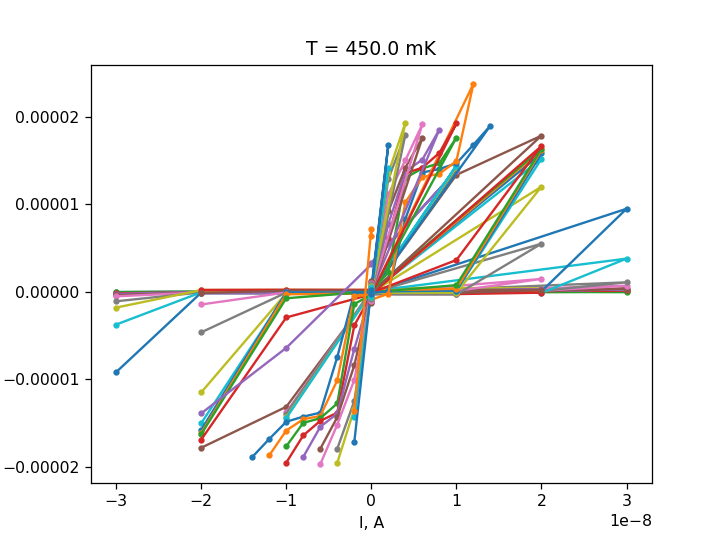

In [81]:
fig, ax = plt.subplots()


exp = exps[-1]
for cos in exp['cos'][:]:
    
    plot_by_key(exp, 'cos', cos, ax, marker = '.', ls = '-')
    

ax.set_title('T = {:2.1f} mK'.format(exp['T'] *1e3)) 

ax.set_xlabel('I, A')
ax.set_ylabel('V, V')

# ax.set_ylim(-1e-6, 1e-6)
    
ax.legend().remove()

# Fitting

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


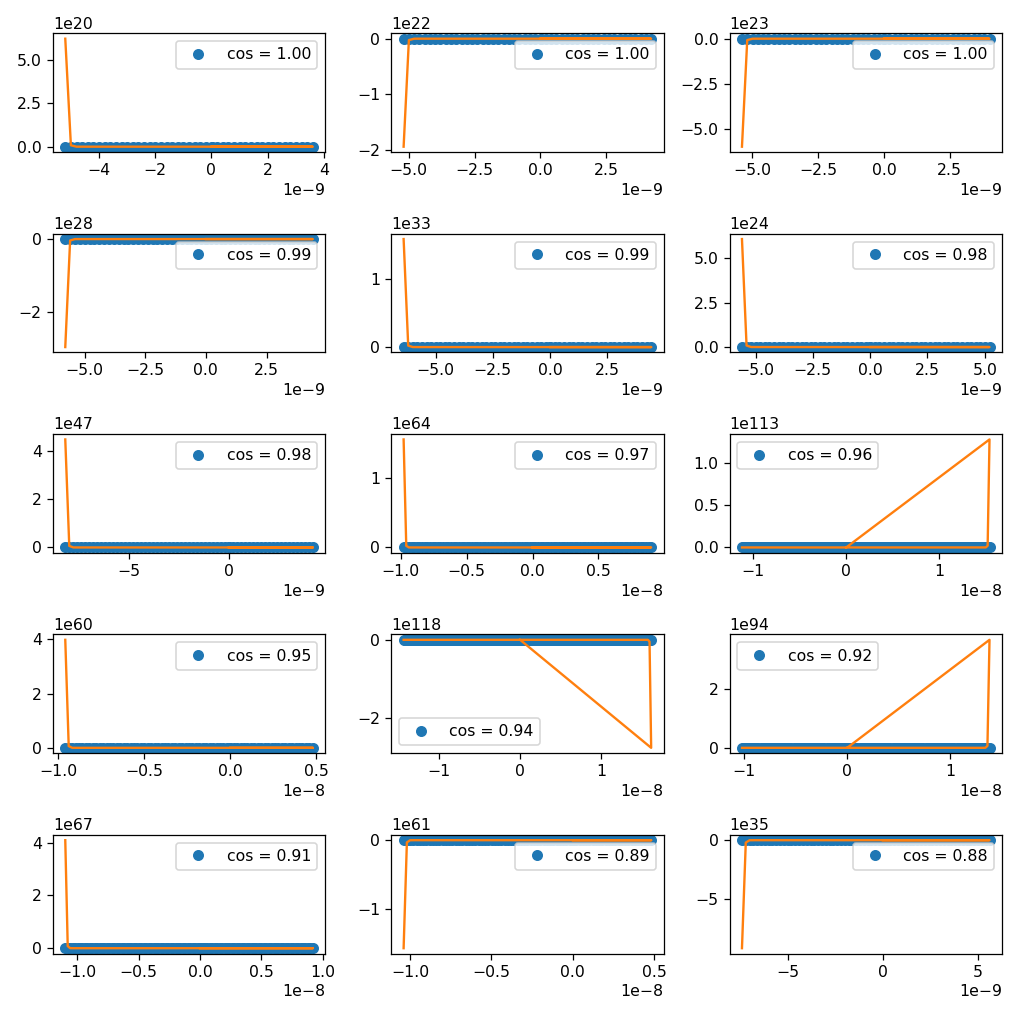

[-1.17530601e-22  1.00000000e+00]
[3.95762380e-21 9.99999998e-01]
[1.96633870e-21 9.99999999e-01]
[2.49517679e-20 9.99999997e-01]
[-5.78032454e-21  1.00000000e+00]
[-1.33003687e-21  9.99999999e-01]
[-2.36716637e-22  1.00000000e+00]
[-8.13628464e-20  9.99999999e-01]
[6.87891234e-21 9.99999999e-01]
[-9.35910765e-20  9.99999998e-01]
[-2.34878328e-19  9.99999999e-01]
[2.67004947e-20 1.00000000e+00]
[-3.23363561e-21  1.00000000e+00]
[5.73349397e-21 9.99999998e-01]
[1.02233693e-19 9.99999995e-01]


In [176]:
R_env = 1e3
Cj = 1.5e-15


EJ0= .04


EJs = []
Tns = []
coss = []

exp = exps[-1]

fig = plt.figure(figsize = (9,9))
gs = GridSpec.GridSpec(5, 3)

for i in range(15):
# for i, j in enumerate([0,3,4,5,6,7,8, 11, 12, 14,15,16]):
    
    ax = fig.add_subplot(gs[i] )
    
    j = 1*i+0
    cos = exp['cos'][j]
    I, V = exp['Is'][j] , exp['Vs'][j]
    
    ax.plot( I, V , 'o' ,label = 'cos = {:1.2f}'.format(cos))


    
    Tb = exp['T']
    
    V_fit = lambda x, A,B  : A*np.sinh(x*B*cos/Tb)
    popt1 = ( 1e-6 , 1)
    try:
        popt, pcov = curve_fit(V_fit, I/1e-9 ,V/1e-6, p0 = popt1 )
    except RuntimeError: 
        popt = [np.nan, np.nan]
    

    Vs = V_fit(I/1e-9, *popt)*1e-6

    ax.plot(I, (Vs ))

    print(popt)
    
    EJ, Tn = popt[0], popt[1] 

    EJs.append(EJ)
    Tns.append(Tn)
    coss.append(cos)

    

    ax.legend()
    
    plt.tight_layout()

In [177]:
EJs = []
Tns = []
coss = []

exp = exps[0]

for j, cos in enumerate(exp['cos']):
    
    I, V = exp['Ils'][j] , exp['Vls'][j]
    
    Tb = exp['T']
    
    V_fit = lambda x, A,B  : A*np.sinh(x*B/Tb)
#     V_fit = lambda x, A,B  : A*cos**2*np.sinh(x*B*cos**2/Tb)

    popt1 = ( 1e-3 , 1)
    try:
        popt, pcov = curve_fit(V_fit, I/1e-9 ,V/1e-6, p0 = popt1 )
    except RuntimeError: 
        popt = [np.nan, np.nan]
    except TypeError: 
        popt = [np.nan, np.nan]    

    print(popt, cos)
    
    EJ, Tn = popt[0], popt[1] 

    EJs.append(EJ)
    Tns.append(Tn)
    coss.append(cos)


D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:746: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
D:\anaconda\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[-1.78756326e-15  1.00000000e+00] 1.0
[-1.21655448e-15  9.99999998e-01] 0.9960198804080459
[4.11896260e-16 9.99999996e-01] 0.9841112043361161
[1.65995887e-17 9.99999998e-01] 0.9643687676941068
[3.56640537e-16 9.99999995e-01] 0.9369497249997617
[3.52502199e-19 1.00000000e+00] 0.9020723383911214
[-6.60342401e-18  9.99999999e-01] 0.8600142402077006
[2.93388483e-18 1.00000000e+00] 0.8111102229706592
[8.91561538e-18 1.00000000e+00] 0.7557495743542584
[2.93388483e-18 1.00000000e+00] 0.6943729783628606
[-3.49519013e-18  1.00000000e+00] 0.627469007380852
[-3.48847733e-18  9.99999999e-01] 0.5555702330196023
[3.02680843 0.06995495] 0.47924898672005684
[15.17012131  0.0568471 ] 0.3991128038575741
[20.01156291  0.11964072] 0.315799587615025
[nan, nan] 0.22997253112088056
[nan, nan] 0.14231483827328534
[nan, nan] 0.053524285273615115
[nan, nan] 0.03569233383898059
[nan, nan] 0.12462483343718568
[16.85800171  0.12899592] 0.2125652895529767


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


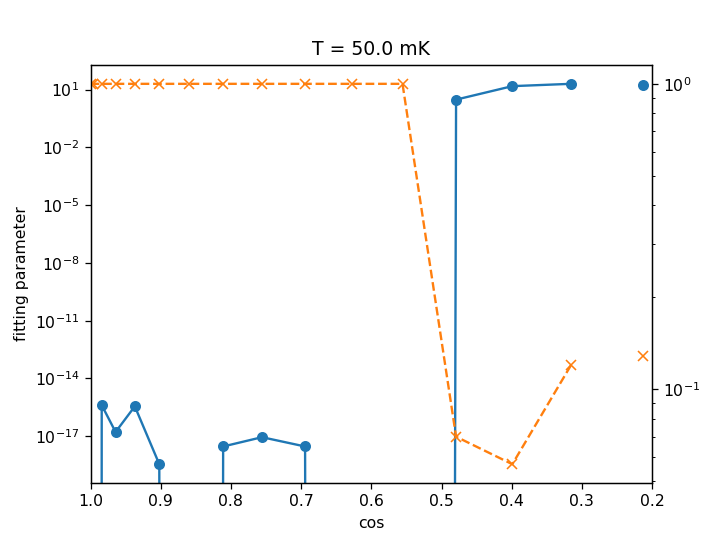

In [178]:
fig, ax = plt.subplots()

ax.plot(coss, EJs, 'o-')
# ax.set_ylim(0, 1.5)
ax.set_yscale('log')
ax2 = ax.twinx()

ax2.plot(coss, Tns, 'x--', c = 'C1')
# ax2.set_ylim(0, 1)

ax.set_xlim(1, 0.2)


ax.set_xlabel('cos')
ax.set_ylabel('fitting parameter')

ax.set_title ('T = {:2.1f} mK'.format(exp['T']*1e3) )
ax2.set_yscale('log')

# Histograms

In [442]:
keys = [    'id',   'T',       'cos',          'comments'        ]  

valss =[[ 1190 ,  45e-3,       1  ,    'AWG'  ],
       [  1192 ,  45e-3,       1  ,    'AWG'  ],
       [  1194 ,  45e-3,       1  ,    'AWG'  ],
       [  1196 ,  45e-3,       1  ,    'AWG'  ],
       [  1198 ,  45e-3,       1  ,    'AWG'  ],
       [  1204 , 100e-3,       1  ,    'AWG'  ],
       [  1206 , 150e-3,       1  ,    'AWG'  ],
       [  1208 , 200e-3,       1  ,    'AWG'  ],
       [  1210 , 250e-3,       1  ,    'AWG'  ],
       [  1212 , 300e-3,       1  ,    'AWG'  ],
       [  1216 , 200e-3,       1  ,    'AWG'  ],
       [  1219 , 45e-3,       1  ,    'AWG'  ],
       [  1220 , 45e-3,       1  ,    'AWG'  ],
       [  1224 , 45e-3,       1  ,    'negative' ],
        
        
       [  1225 , 45e-3,        1 ,     '6220']]

  
        
hists = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

In [478]:
# hists = []
keys = [    'id',   'T',       'cos',          'comments'        ]  

idx = 1303

hists.append(  { key : val for key, val in zip(keys, [1225, 45e-3, 1, '6220'])  }    )

for T in [ .100, .150, .200, .300]:
    for cos in [1, 0.7, 0.3]:
        
        hists.append(  { key : val for key, val in zip(keys, [idx, T, cos, '6220'])  }    )
        idx +=1

In [393]:
idx = 1368
for cos in np.linspace(1,0.1,10):

        
        hists.append(  { key : val for key, val in zip(keys, [idx, 45e-3, cos, '6220'])  }    )
        idx +=1

In [479]:
hists = []
idx = 1379# hists = []

for cos in np.linspace(.5,0.1,9):

        
        hists.append(  { key : val for key, val in zip(keys, [idx, 45e-3, cos, '6220'])  }    )
        idx +=1

D:\anaconda\lib\site-packages\qcodes\dataset\plotting.py:199: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


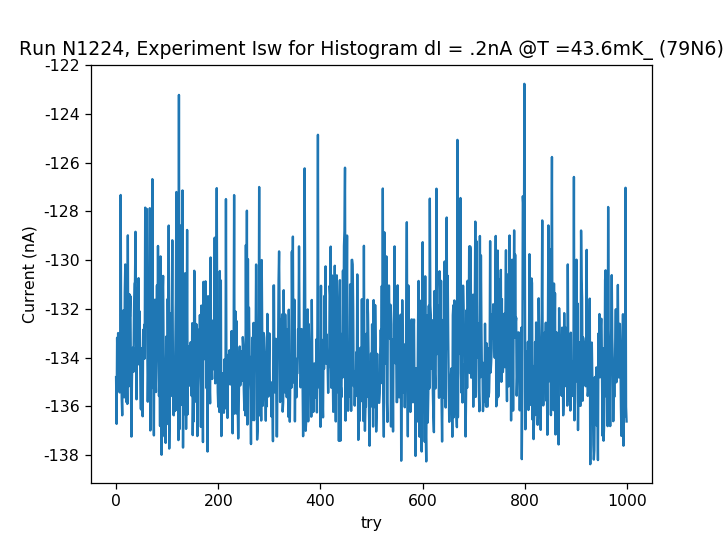

([<matplotlib.axes._subplots.AxesSubplot at 0x163a9c31e10>], [None])

In [386]:
plot_by_id(1224)

id        discription

1190        dIc = .2nA  100pts
1192        dIc = 2nA
1194        dIc = 1nA
1196        dIc = .2nA  200pts
1198        dIc = .2nA  200pts T =  40mK
1204        dIc = .2nA  250pts T = 100mK
1206        dIc = .2nA  250pts T = 150mK
1208        dIc = .2nA  250pts T = 200mK
1210        dIc = .2nA  250pts T = 250mK
1212        dIc = .2nA  250pts T = 300mK
1216        dIc = .2nA  250pts T = 200mK
1219        dIc = .5nA  200pts T =  40mK
1220        dIc = .2nA 1000pts T =  40mK
1224        dIc = -.2nA 1000pts T =  40mK  negative

1225        dIc = .2nA 1000pts T =  40mK  6220

In [240]:
def load_hist_by_id(idx):
    _, Isws = xy_by_id(idx)
    return Isws

In [412]:
def plot_hist_by_id(idx, ax = None, bins = 51, label = ''):
    _, Isws = xy_by_id(idx)
    if ax is None:
        fig, ax = plt.subplots()
        add_legend = True
    else:
        add_legend = False
    ax.hist(Isws, bins = bins,  label = label)
    if add_legend:
        ax.legend()
    

In [418]:
def plot_hist(hist, ax = None, bins = 51, label = ''):
    if label == '':
        label = 'Tphy = {:1.0f} mK, cos = {:1.2f}'. format(hist['T']/1e-3, hist['cos'])
    plot_hist_by_id(hist['id'], ax = ax, bins = bins, 
                    label = label)

<IPython.core.display.Javascript object>


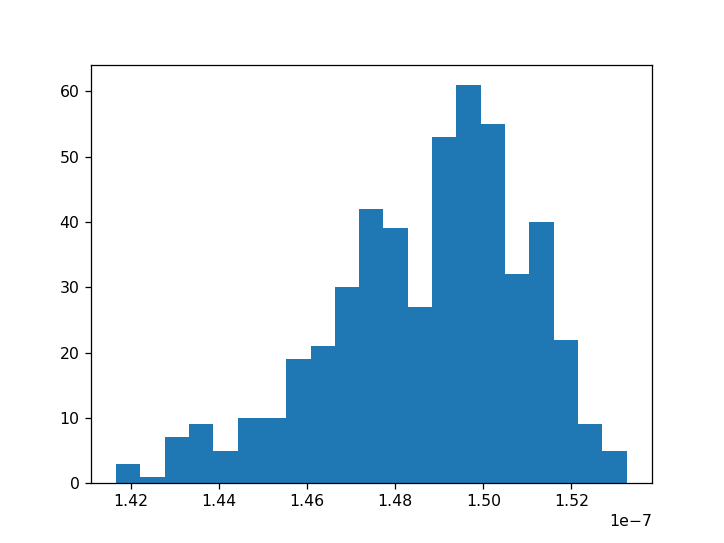

(array([ 3.,  1.,  7.,  9.,  5., 10., 10., 19., 21., 30., 42., 39., 27.,
        53., 61., 55., 32., 40., 22.,  9.,  5.]),
 array([1.41655000e-07, 1.42207381e-07, 1.42759762e-07, 1.43312143e-07,
        1.43864524e-07, 1.44416905e-07, 1.44969286e-07, 1.45521667e-07,
        1.46074048e-07, 1.46626429e-07, 1.47178810e-07, 1.47731190e-07,
        1.48283571e-07, 1.48835952e-07, 1.49388333e-07, 1.49940714e-07,
        1.50493095e-07, 1.51045476e-07, 1.51597857e-07, 1.52150238e-07,
        1.52702619e-07, 1.53255000e-07]),
 <a list of 21 Patch objects>)

In [41]:
Isws = []
for ids in [1190, 1196, 1198]:
    _, Isw = xy_by_id(ids)

    Isws = np.append(Isw, Isws)
 


fig, ax = plt.subplots()
ax.hist(Isws, bins = 21)

# _, Isw = xy_by_id(1219)
# ax.hist(Isw, bins = 21)
# np.std(Isws)

2.470355408676086e-09


<IPython.core.display.Javascript object>


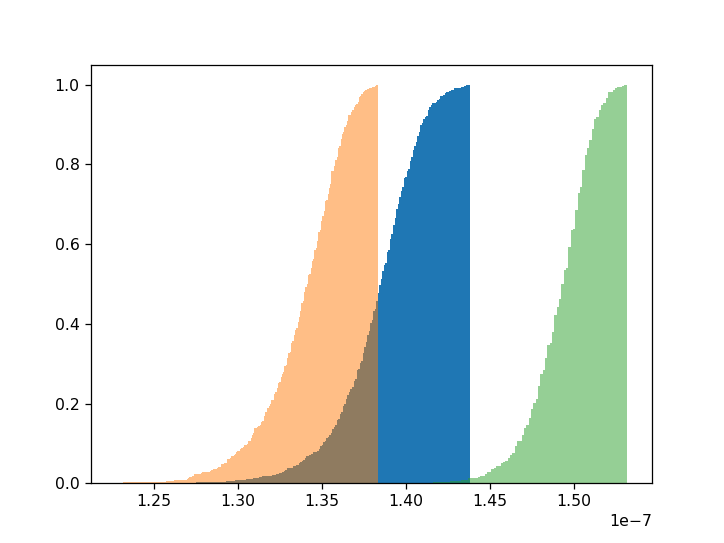

2.4045688516231084e-09
1.9762474430539263e-09


In [174]:
Isws = []
for ids in [1219, 1220]:
    _, Isw = xy_by_id(ids)

    Isws = np.append(Isw, Isws)
 
print(np.std(Isws))

fig, ax = plt.subplots()
ax.hist(Isws, bins = 201, cumulative = True, density = True)

_, Isw = xy_by_id(1224)
ax.hist(abs(Isw), bins = 201, cumulative = True, color = 'C1', density = True, alpha = 0.5)
# ax.hist(Isws, bins = 201)
print(np.std(Isw))

_, Isw = xy_by_id(1225)
ax.hist(abs(Isw), bins = 201, cumulative = True, color = 'C2', density = True, alpha = 0.5)
# ax.hist(Isws, bins = 201)
print(np.std(Isw))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


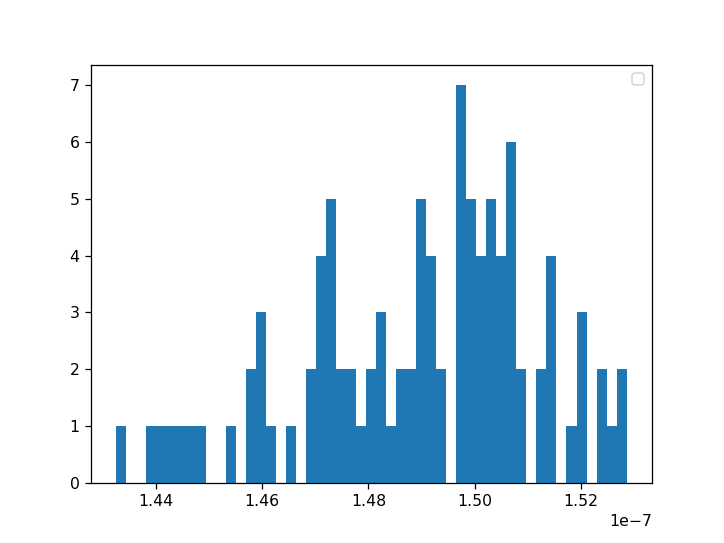

No handles with labels found to put in legend.


In [419]:
plot_hist_by_id( hists [0]['id'] )

In [ ]:
def get_coeff_Ib(hist):
    

In [5]:
def fit_hist(hist, ax = None, EJ = 4, Ec = 0.05, bins = 21):

    eps = .001
    
    Isw = abs(load_hist_by_id( hist ['id'] ))

    counts, Ibins = np.histogram(Isw, bins = 21)
    dI = np.mean( np.diff(Ibins) )
    dIdt = 30e-9

    SP = np.cumsum(counts)/len(Isw)
    Gamma = np.array([ np.log( (1 - SP[i])/(1 - SP[i+1]) ) for i in range(len(SP)-1)  ])*dIdt/dI


#     EJ = 3
#     Ec = .05


    Ic = 2*pi*EJ/Φ0*kB*hist['cos']
    Ic0 = 1.5 * np.max(Isw)
    Ib = Ibins[:-2]
    
    while abs((Ic - Ic0)/Ic) > eps:
        Ic = Ic0
        wa = wpK(EJ**hist['cos'], Ec)*kB/hbar * (1 - (Ib/Ic)**2)**0.25

        coeff =  (-np.log(2*pi*Gamma/wa))**(2/3)
        idx = np.isfinite(coeff) 
        
        a, b = np.polyfit( Ib[idx], coeff[idx],1)
        Ic0 = -b/a
        Teff = -1/kB*Φ0/2/pi*4*np.sqrt(2)/3 /np.sqrt(b)/a
        

    if ax is None:
        fig, ax = plt.subplots()
        add_legend = True
    else:
        add_legend = False
    l = ax.plot(Ib, coeff, 'x', label = 'Tphy = {:1.0f} mK, cos = {:1.2f}'. format(hist['T']/1e-3, hist['cos']))
    c = l[0].get_color()
    
    Iplot = np.linspace(np.min(Ib[idx]), Ic0, 101)
    ax.plot(Ib[idx], a*Ib[idx] + b, c = c, ls = '--', 
            label = 'Tesc = {:1.0f} mK, Ico = {:1.0f} nA'. format(Teff/1e-3, Ic0/hist['cos']*1e9))
    if add_legend:
        ax.legend()

    
    
    
    return Ic0, Teff
    

In [319]:
fit_hist(hist, ax = None, EJ = 4, Ec = 0.05, bins = 21)

list

In [357]:
def hist_by_val(hists, keys, vals):

    for key, val in zip(keys, vals):
        

        hist_ = [ h for h in hists if h[key]==val ]
        
        hists = hist_
        
    return hists

In [375]:
hs

[{'id': 1224, 'T': 0.05, 'cos': 1, 'comments': 'negative'},
 [{'id': 1225, 'T': 0.045, 'cos': 1, 'comments': '6220'}]]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


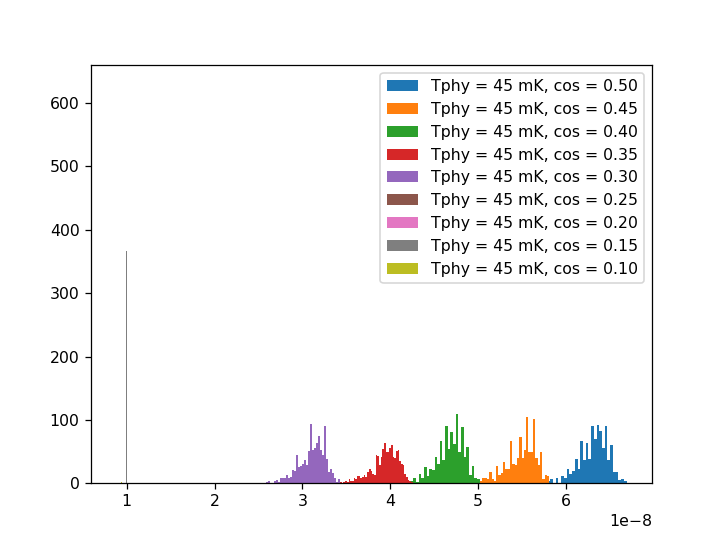

In [486]:
fig, ax = plt.subplots()
hs = hist_by_val(hists, ['comments'], ['AWG'])[:-4]
# hs = hist_by_val(hists, ['T'], [45e-3])
hs.append( hist_by_val(hists, ['comments'], ['6220'])[1] )

hs = hists
for h in hs[:]:
    plot_hist(h,ax)
    #fit_hist(h, ax, EJ = 4.5, Ec = 0.05, bins = 51)
    
ax.legend()    

In [409]:
linspace .5 .1 9
1379

[{'id': 1190, 'T': 0.04, 'cos': 1, 'comments': ''},
 {'id': 1192, 'T': 0.04, 'cos': 1, 'comments': ''},
 {'id': 1194, 'T': 0.04, 'cos': 1, 'comments': ''},
 {'id': 1196, 'T': 0.04, 'cos': 1, 'comments': ''},
 {'id': 1198, 'T': 0.04, 'cos': 1, 'comments': ''},
 {'id': 1204, 'T': 0.5, 'cos': 1, 'comments': ''},
 {'id': 1206, 'T': 0.55, 'cos': 1, 'comments': ''},
 {'id': 1208, 'T': 0.6, 'cos': 1, 'comments': ''},
 {'id': 1210, 'T': 0.65, 'cos': 1, 'comments': ''},
 {'id': 1212, 'T': 0.5, 'cos': 1, 'comments': ''},
 {'id': 1216, 'T': 0.55, 'cos': 1, 'comments': ''},
 {'id': 1219, 'T': 0.6, 'cos': 1, 'comments': ''},
 {'id': 1220, 'T': 0.65, 'cos': 1, 'comments': ''},
 {'id': 1224, 'T': 0.045, 'cos': 1, 'comments': 'negative'},
 {'id': 1225, 'T': 0.04, 'cos': 1, 'comments': '6620'},
 {'id': 1225, 'T': 0.045, 'cos': 1, 'comments': '6220'},
 {'id': 1303, 'T': 0.1, 'cos': 1, 'comments': '6220'},
 {'id': 1304, 'T': 0.1, 'cos': 0.7, 'comments': '6220'},
 {'id': 1305, 'T': 0.1, 'cos': 0.3, 'comme

In [477]:
for h in hists:
    plot_hist(h)

KeyError: 'cos'

<IPython.core.display.Javascript object>


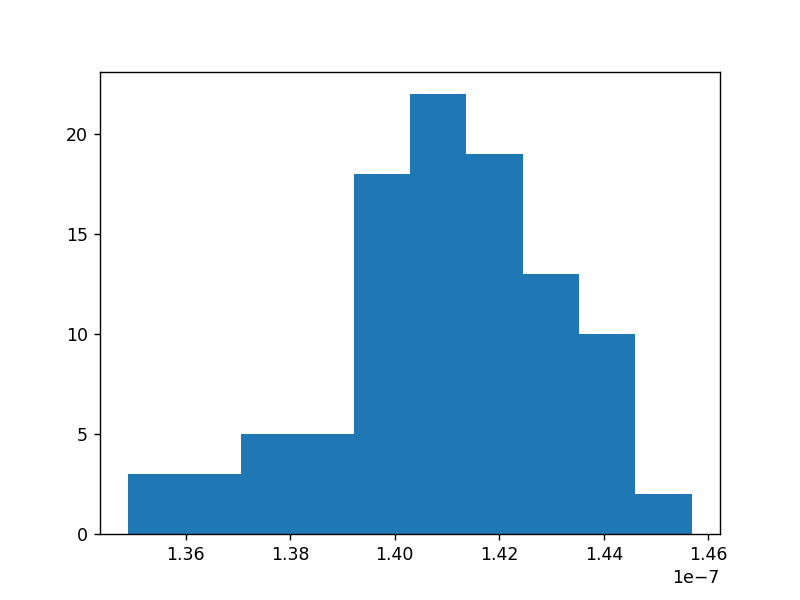

D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


[1.52161036e+11 1.52112928e+11 1.52064698e+11 1.52016347e+11
 1.51967874e+11 1.51919279e+11 1.51870561e+11 1.51821721e+11
 1.51772758e+11 1.51723671e+11 1.51674461e+11 1.51625126e+11
 1.51575668e+11 1.51526084e+11 1.51476376e+11 1.51426542e+11
 1.51376582e+11 1.51326496e+11 1.51276284e+11 1.51225945e+11
 1.51175479e+11 1.51124886e+11 1.51074165e+11 1.51023315e+11
 1.50972337e+11 1.50921231e+11 1.50869995e+11 1.50818629e+11
 1.50767134e+11 1.50715508e+11 1.50663751e+11 1.50611864e+11
 1.50559845e+11 1.50507694e+11 1.50455411e+11 1.50402996e+11
 1.50350448e+11 1.50297766e+11 1.50244951e+11 1.50192002e+11
 1.50138918e+11 1.50085699e+11 1.50032346e+11 1.49978856e+11
 1.49925231e+11 1.49871469e+11 1.49817570e+11 1.49763534e+11
 1.49709361e+11 1.49655049e+11]
2.072094746023837e-07 0.07883585557485907
[1.44277991e+11 1.44194684e+11 1.44111102e+11 1.44027243e+11
 1.43943106e+11 1.43858689e+11 1.43773992e+11 1.43689014e+11
 1.43603752e+11 1.43518205e+11 1.43432372e+11 1.43346253e+11
 1.43259844

<IPython.core.display.Javascript object>


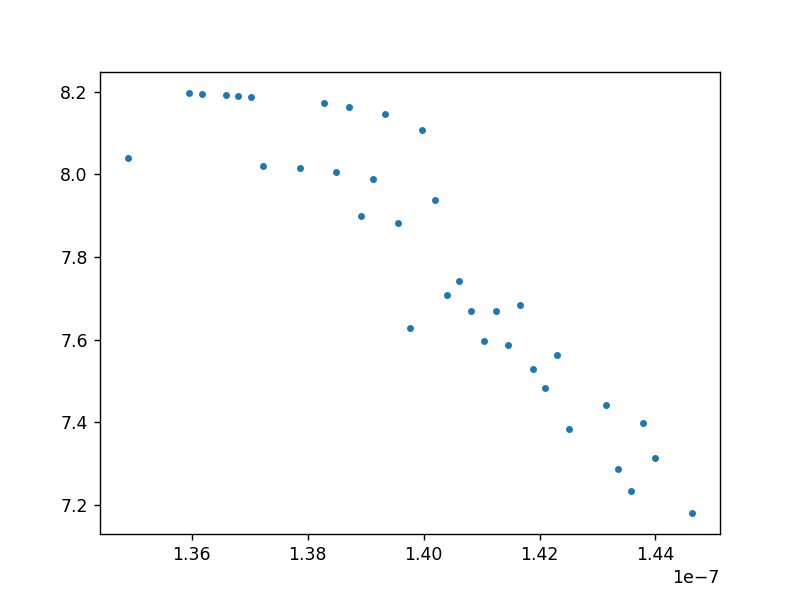

2.068307010649712e-07
0.07845802007640608


In [7]:
eps = .01
fig, ax = plt.subplots()
Isw = load_hist_by_id( 1573 )

ax.hist(Isw)
# plot_hist_by_id( 1225 )

counts, Ibins = np.histogram(Isw, bins = 51)
dI = np.mean( np.diff(Ibins) )
dIdt = 30e-9

SP = np.cumsum(counts)/len(Isw)
Gamma = np.array([ np.log( (1 - SP[i])/(1 - SP[i+1]) ) for i in range(len(SP)-1)  ])*dIdt/dI


EJ = 4
Ec = .05


Ic = 2*pi*EJ/Φ0*kB
Ic0 = Ic*1.5
Ib = Ibins[:-2]

while abs((Ic - Ic0)/Ic) > eps:
    Ic = Ic0    
    wa = wpK(EJ, Ec)*kB/hbar * (1 - (Ib/Ic)**2)**0.25

    coeff =  (-np.log(2*pi*Gamma/wa))**(2/3)
    print(wa)
    idx = np.isfinite(coeff) 

    a, b = np.polyfit( Ib[idx], coeff[idx],1)
    Ic0 = -b/a
    Teff = -1/kB*Φ0/2/pi*4*np.sqrt(2)/3 /np.sqrt(b)/a

    print(Ic0, Teff)


fig, ax = plt.subplots()
ax.plot(Ib, coeff, '.')
#ax.set_yscale('log')
idx = np.isfinite(coeff) 
a, b = np.polyfit( Ib[idx], coeff[idx],1)
print(-b/a)
print(-1/kB*Φ0/2/pi*4*np.sqrt(2)/3 /np.sqrt(b)/a)

In [4]:
x = 199*.7

print(x)




139.29999999999998


In [189]:
T_list = [1,2,3]


for T in T_list:
    heater(T)
    print('meas something')


meas something
meas something
meas something


In [158]:
def heater(T):
    

        print('do something')
        
        yield